# Geographical Experimentation

In this notebook, what we want to do is use some of our data to get an idea how we can better deploy our data using the geographical tools Python has available to us. Another thing we want to do is figure out how to use animations in Python/matplotlib.

Questions:

1. How do we best present the data visually?

2. How do we use such data in analysis?

In [1]:
import pandas as pd

In [2]:
NDData = pd.read_pickle('IEData/NaDeneDraws.pkl')

## Description

Each of the above is a parameterized tree, with attributes (those that we have added): name, title, states, lat, lon, D, deathmat, deathdata, deathmin, deathmax, splittimes, resolvedtree, branchpositions, numberbranches, interiorbranches, builtcols, dimInfo, order, depth, filledtimeFractions, timeFractions, Path, BranchRoute, timeinplace

In [10]:
NDData[0].timeinplace

AttributeError: 'ParameterizedTree' object has no attribute 'timeinplace'

In [17]:
NDData[0].RouteChooser()
NDData[0].TimeInPlace()

/home/mjbaker/anaconda3/lib/python3.5/site-packages/numpy/matrixlib/defmatrix.py:318: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  out = N.ndarray.__getitem__(self, index)
/home/mjbaker/InstEvo/PyInstEvo.py:708: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  Bhat = np.copy(TFR[tu,bp[i,1]:])


In [28]:
depth = NDData[0].depth
times = [time*depth for time in NDData[0].timeinplace]

Using just the above information, we should be able to make a time-lapse graph. that is, we can do something like the following:

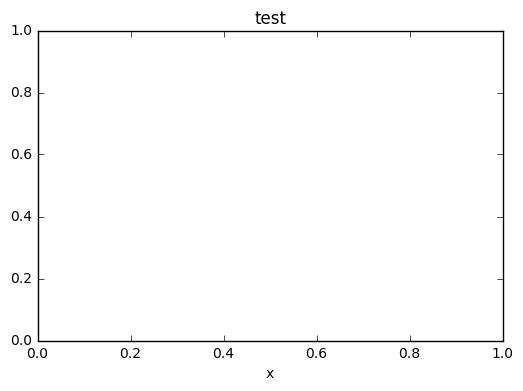

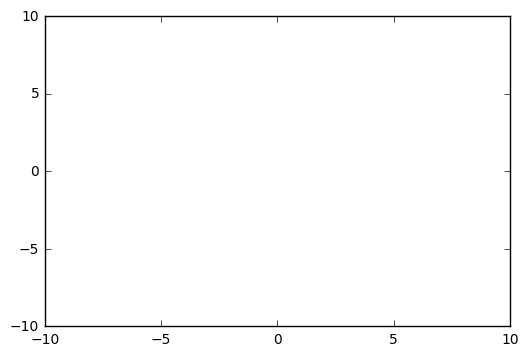

In [32]:
"""
=========================
Simple animation examples
=========================

This example contains two animations. The first is a random walk plot. The
second is an image animation.
"""

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation as animation
%matplotlib inline


def update_line(num, data, line):
    line.set_data(data[..., :num])
    return line,

fig1 = plt.figure()

data = np.random.rand(2, 25)
l, = plt.plot([], [], 'r-')
plt.xlim(0, 1)
plt.ylim(0, 1)
plt.xlabel('x')
plt.title('test')
line_ani = animation.FuncAnimation(fig1, update_line, 25, fargs=(data, l),
                                   interval=50, blit=True)

# To save the animation, use the command: line_ani.save('lines.mp4')

fig2 = plt.figure()

x = np.arange(-9, 10)
y = np.arange(-9, 10).reshape(-1, 1)
base = np.hypot(x, y)
ims = []
for add in np.arange(15):
    ims.append((plt.pcolor(x, y, base + add, norm=plt.Normalize(0, 30)),))

im_ani = animation.ArtistAnimation(fig2, ims, interval=50, repeat_delay=3000,
                                   blit=True)
# To save this second animation with some metadata, use the following command:
# im_ani.save('im.mp4', metadata={'artist':'Guido'})

plt.show()